In [1]:
import numpy as np
import matplotlib.pyplot as plt

from num_opt.stork import Sequential
from num_opt.stork.op import Linear, Leakyrelu, Softmax
from num_opt.stork.loss import CrossEntropyLoss
from num_opt.stork.optim import Adam

from tqdm.notebook import tqdm

In [2]:
# Loading mnist data.
import tensorflow as tf

train_data, test_data = tf.keras.datasets.mnist.load_data()
X_train, y_train = train_data
X_test, y_test = test_data

X_train_t = X_train.reshape(-1, 784) / 255.
X_test_t = X_test.reshape(-1, 784) / 255.

In [3]:
%%time
model = Sequential(
    Linear(784, 150, True),
    Leakyrelu(),
    Linear(150, 100, True),
    Leakyrelu(),
    Linear(100, 10, True),
    Softmax()
)

optimizer = Adam(model.parameters())
losses = []
loss_fn = CrossEntropyLoss()

for i in tqdm(range(2500)):
    batch_idx = np.random.choice(X_train.shape[0], 500, replace=False)
    X_batch = X_train_t[batch_idx]
    y_batch = y_train[batch_idx]
    pred = model(X_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    losses.append(loss.obj)


CPU times: user 5min 25s, sys: 7.02 s, total: 5min 32s
Wall time: 55.5 s


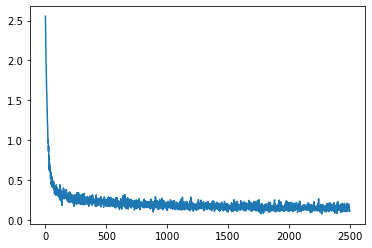

In [4]:
plt.plot(losses)
plt.show()

In [5]:
train_accuracy = np.mean(np.argmax(model(X_train_t), axis = 1) == y_train)
test_accuracy = np.mean(np.argmax(model(X_test_t), axis = 1) == y_test)
print(train_accuracy, test_accuracy)

0.9535833333333333 0.9398
